# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [2]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'])

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

xr.info()
xr.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Euro               4838 non-null   float64
 1   Australian Dollar  4838 non-null   float64
 2   Danish Krone       4838 non-null   float64
dtypes: float64(3)
memory usage: 215.8 KB


,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot all three exchange rates in one graph: 

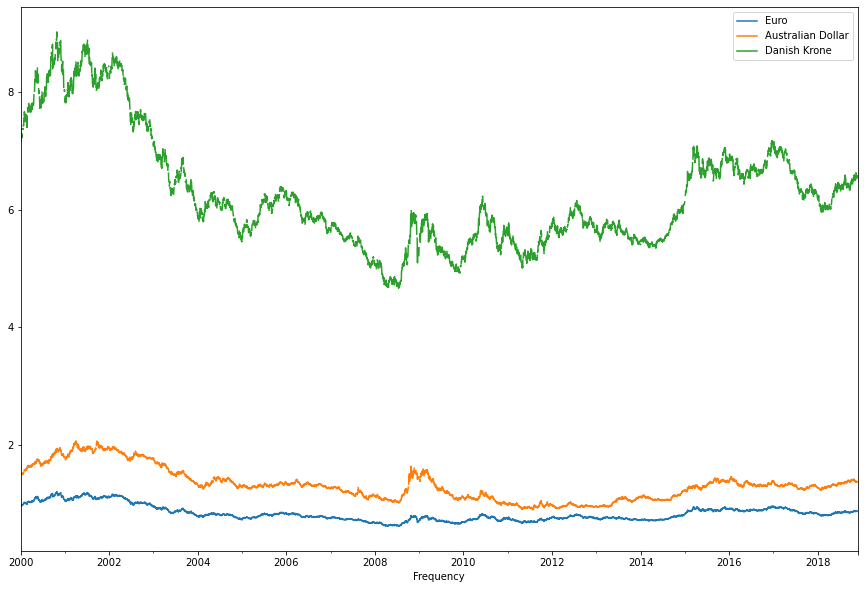

In [3]:
# Plot here
fig = plt.figure(figsize=(15,10))
xr.Euro.plot()
xr['Australian Dollar'].plot()
xr['Danish Krone'].plot()
plt.legend()
plt.show()

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [4]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [5]:
# All currencies are highly correlated, beginning, in increasing order, with:
#    1. Euro ~ Australian Dollar, at 0.883 correlation
#    2. Euro ~ Danish Krone is almost perfectly correlated, at 0.999952; this fact is very clear in their plots

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [6]:
# 1-lag differenced series 
xr_diff = xr.diff(periods=1)

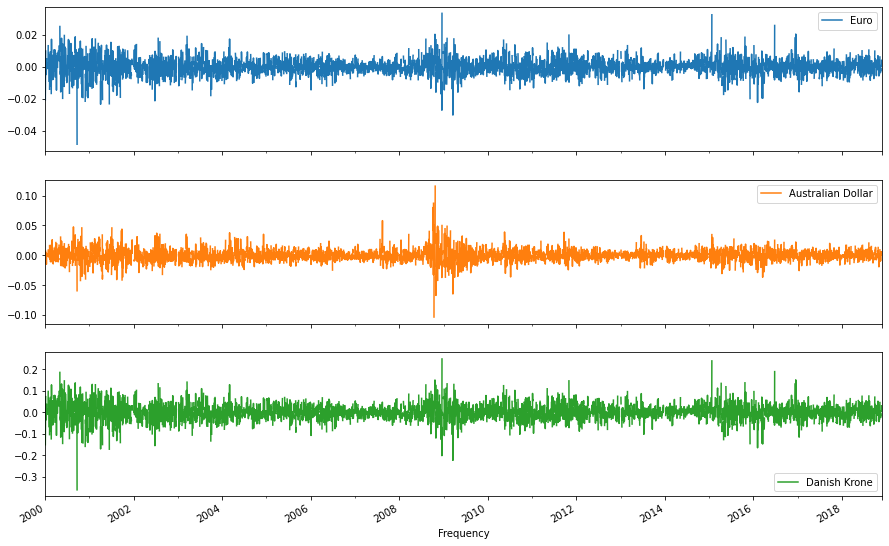

In [7]:
# Plot
xr_diff.plot(figsize=(15,10), subplots=True, legend=True);

Calculate the correlation of this differenced time series. 

In [8]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [9]:
# 1. Euro ~ Australian Dollar correlation decreased to 0.55 in the differenced time series
# 2. However, differencing the time series retained the correlation between Euro ~ Danish Krone almost perfectly

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [10]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods=1)

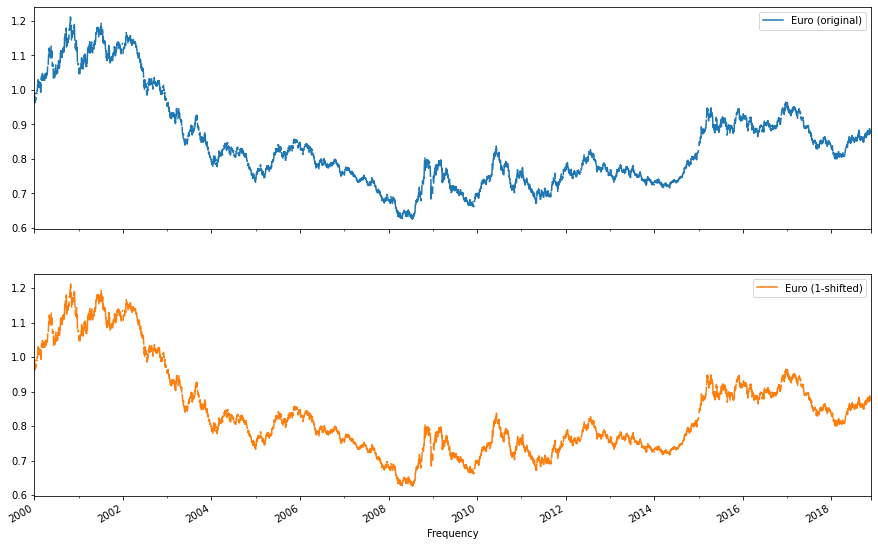

In [11]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis=1)
lag_1.columns = ['Euro (original)', 'Euro (1-shifted)']

# Plot 
lag_1.plot(figsize=(15,10), subplots=True, legend=True);

In [12]:
# Correlation
lag_1.corr()

,Euro (original),Euro (1-shifted)
Euro (original),1.000000,0.999146
Euro (1-shifted),0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

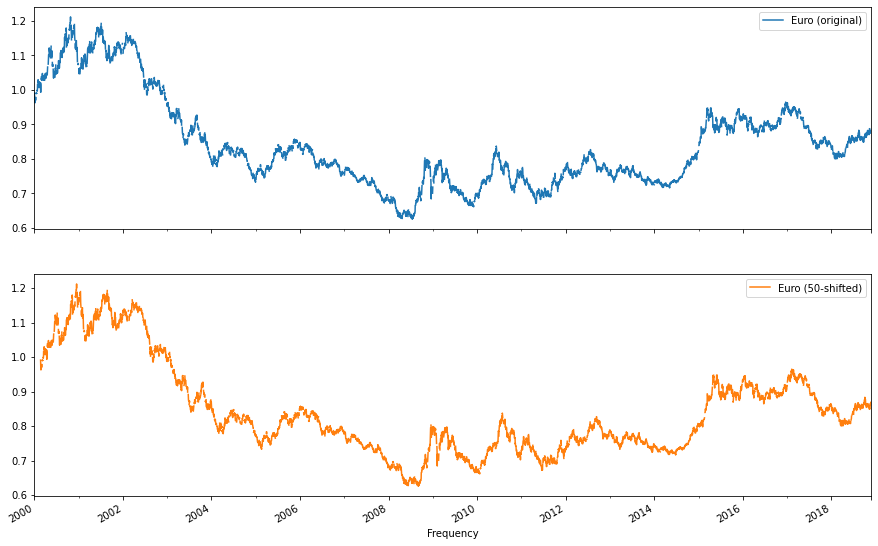

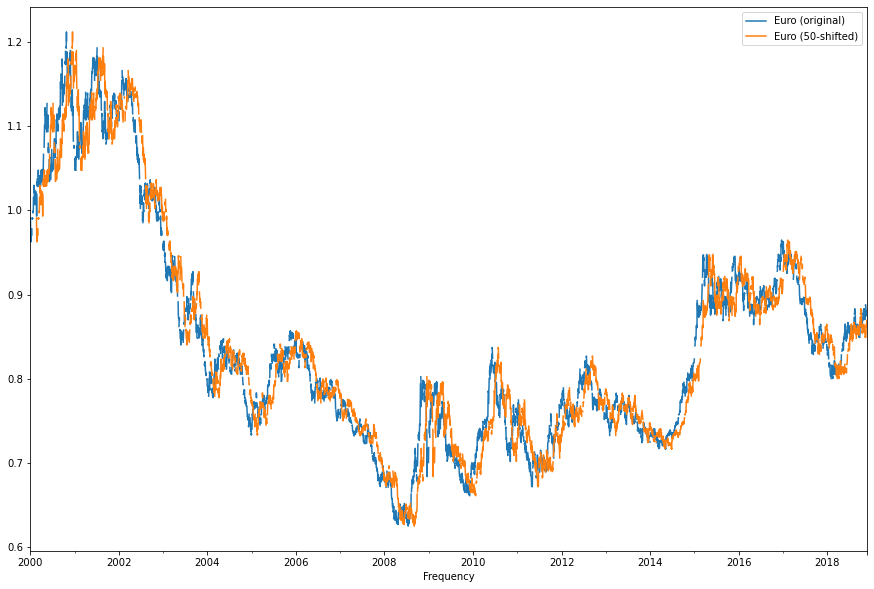

In [13]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis=1)
lag_50.columns = ['Euro (original)', 'Euro (50-shifted)']

# Plot
lag_50.plot(figsize=(15,10), subplots=True, legend=True);
lag_50.plot(figsize=(15,10))
plt.legend()
plt.show()

In [14]:
# Correlation
lag_50.corr()

,Euro (original),Euro (50-shifted)
Euro (original),1.000000,0.968321
Euro (50-shifted),0.968321,1.000000


### What's your conclusion here?

In [15]:
# Correlation is still very, very high, even with a shift of 50 periods.
# Currency "history", by definition, is a random walk, so shifting the period is almost analogous to offsetting the series by some (single) constant value.

Knowing this, let's plot the ACF now.

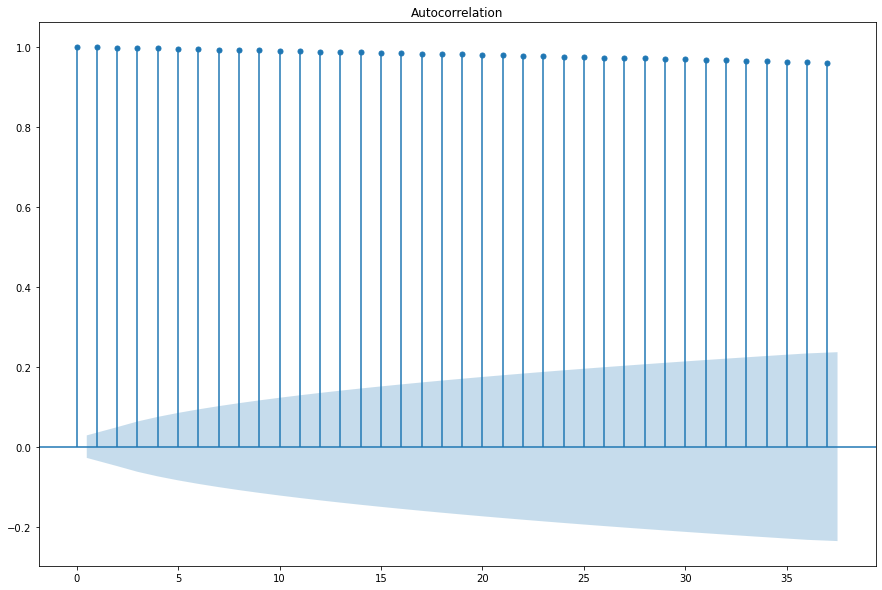

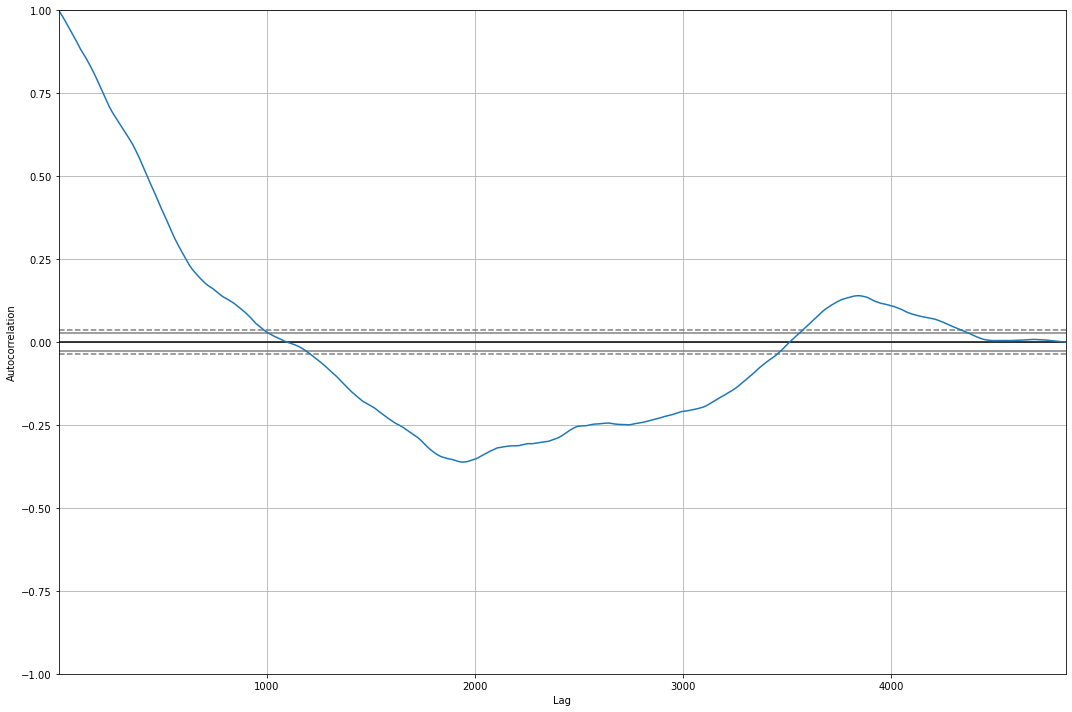

In [16]:
# Plot ACF
rcParams['figure.figsize'] = 15,10
plot_acf(eur.dropna())

fig = plt.figure(figsize=(15,10))
pd.plotting.autocorrelation_plot(eur.dropna())
fig.tight_layout()
plt.show()

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

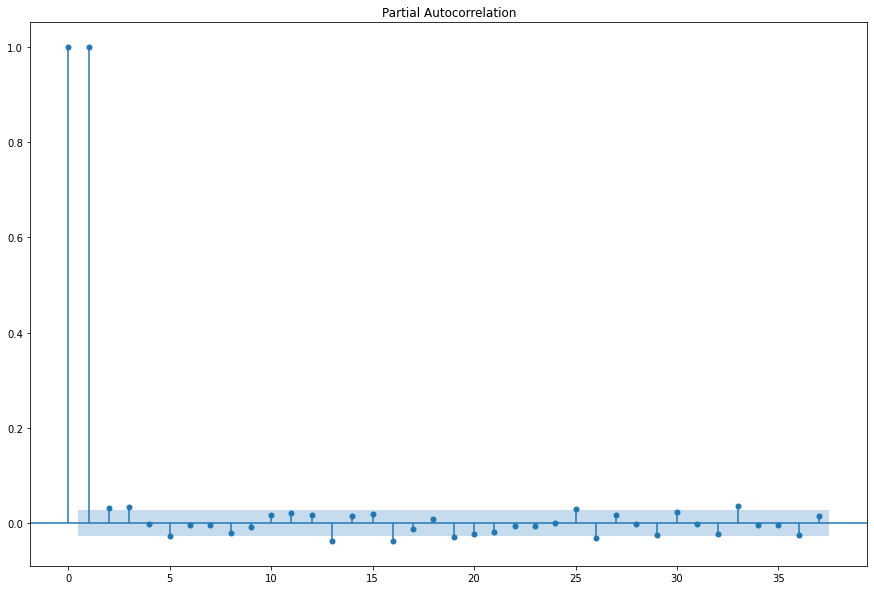

<Figure size 1080x720 with 0 Axes>

In [17]:
# Plot PACF
rcParams['figure.figsize'] = 15,10
plot_pacf(eur.dropna())

fig = plt.figure(figsize=(15,10)); # used only to suppress the duplicated (second) plot from above

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [18]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


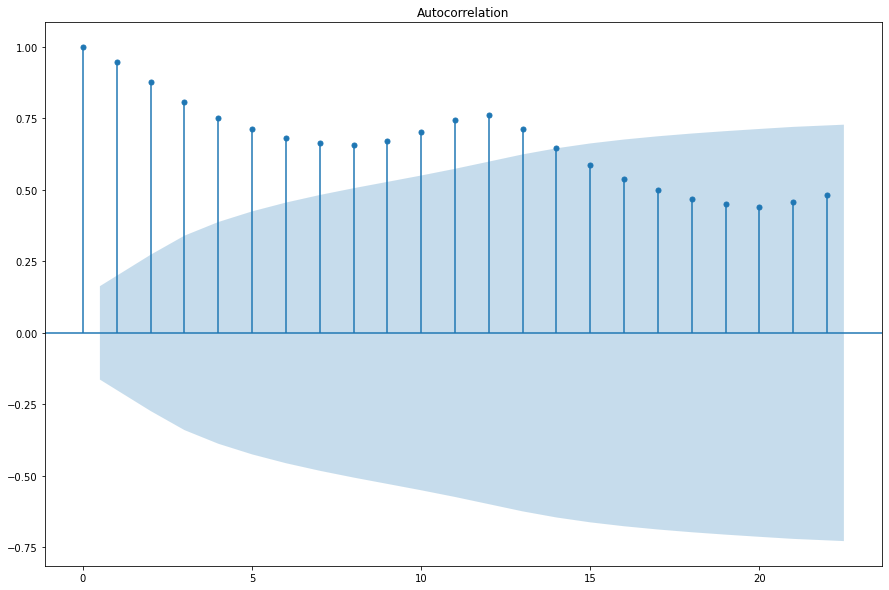

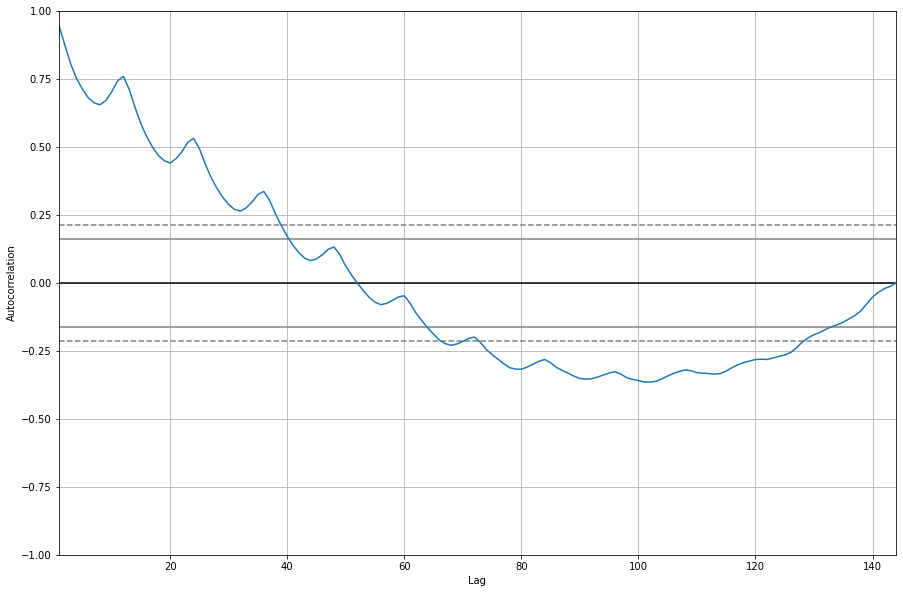

In [19]:
# Plot ACF (regular)
rcParams['figure.figsize'] = 15,10
plot_acf(air.dropna())

plt.figure(figsize=(15,10))
pd.plotting.autocorrelation_plot(air.dropna());

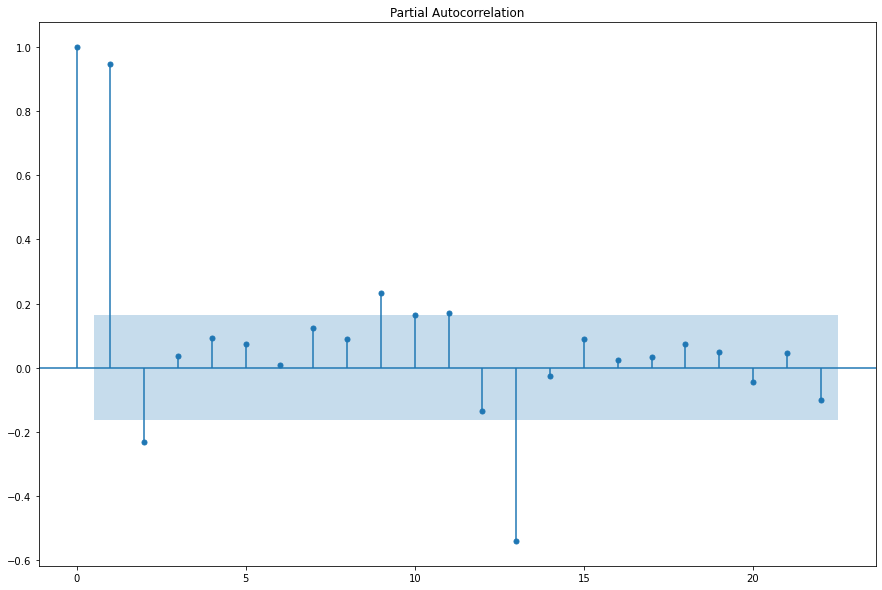

<Figure size 1080x720 with 0 Axes>

In [20]:
# Plot PACF (regular)
rcParams['figure.figsize'] = 15,10
plot_pacf(air.dropna(), method='ywm')

fig = plt.figure(figsize=(15,10)); # used only to suppress the duplicated (second) plot from above

In [21]:
# Generate a differenced series
air_diff = air.diff(periods=1)

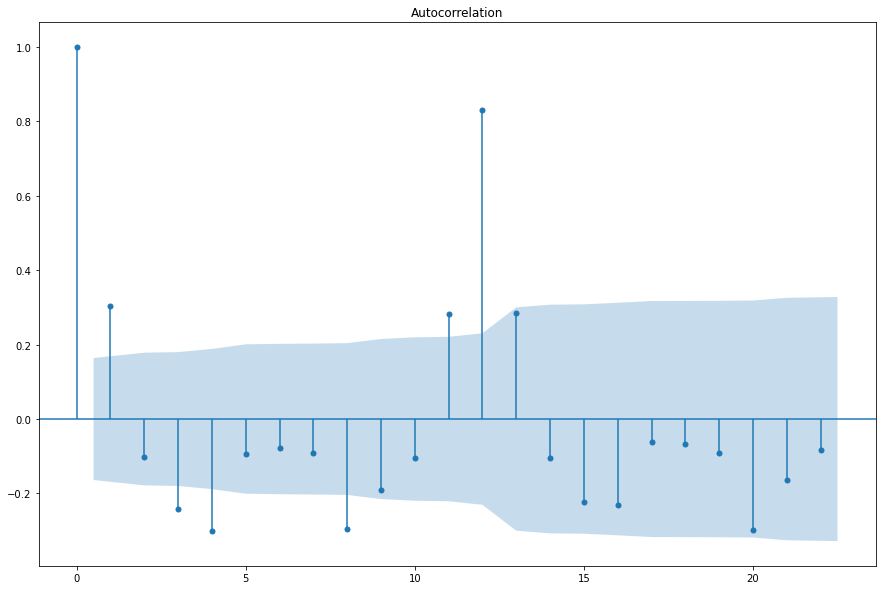

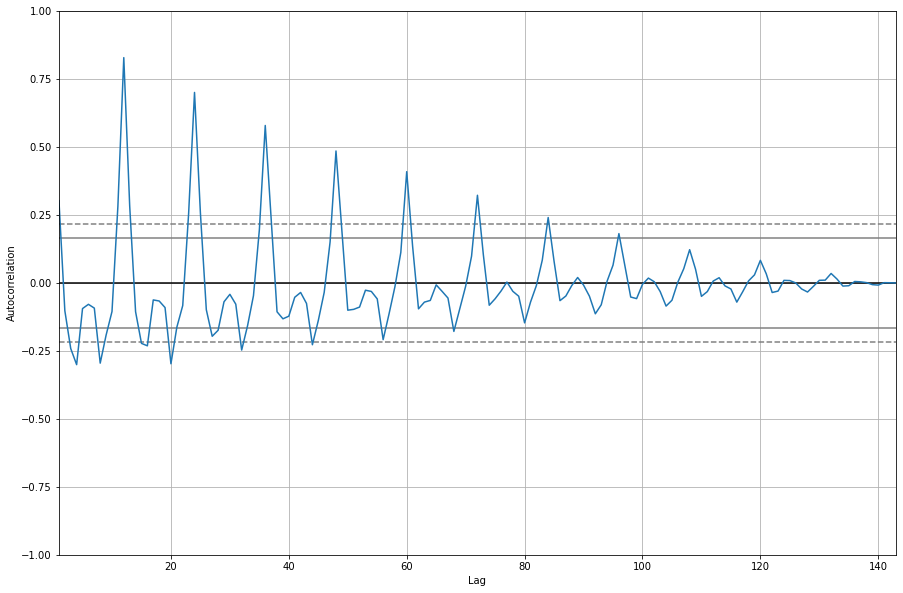

In [22]:
# Plot ACF (differenced)
rcParams['figure.figsize'] = 15,10
plot_acf(air_diff.dropna())

plt.figure(figsize=(15,10))
pd.plotting.autocorrelation_plot(air_diff.dropna());

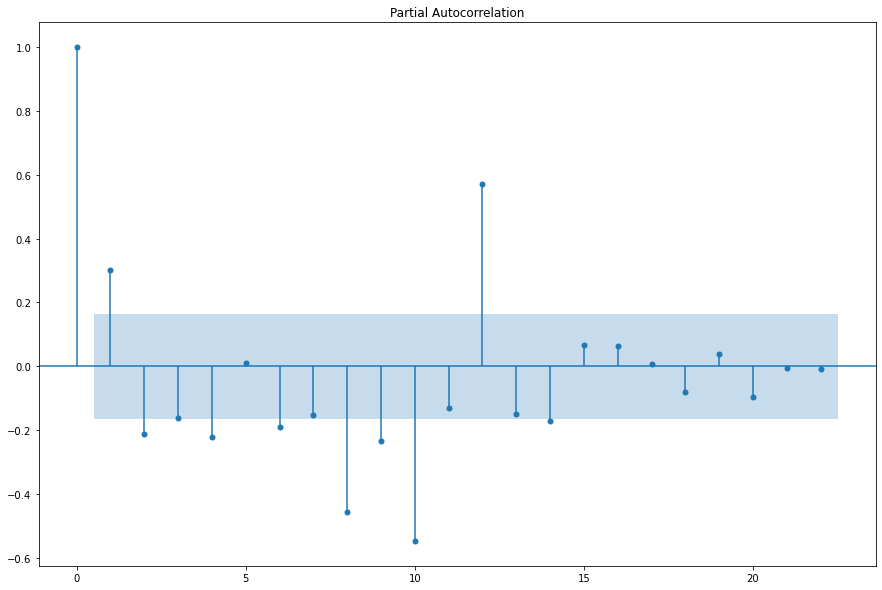

In [23]:
# Plot PACF (differenced)
rcParams['figure.figsize'] = 15,10
fig = plot_pacf(air_diff.dropna(), method='ywm')

### Your conclusion here

In [24]:
# Excluding 0 diff (of course this will produce 100% correlation), the next highest appears to be 0.6 correlation at x==12 (months, given)
# There is a strong negative correlation at 10 months (and a little weaker one at 8 months)
# The ACF plot clearly shows seasonality in differenced time series.

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [25]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


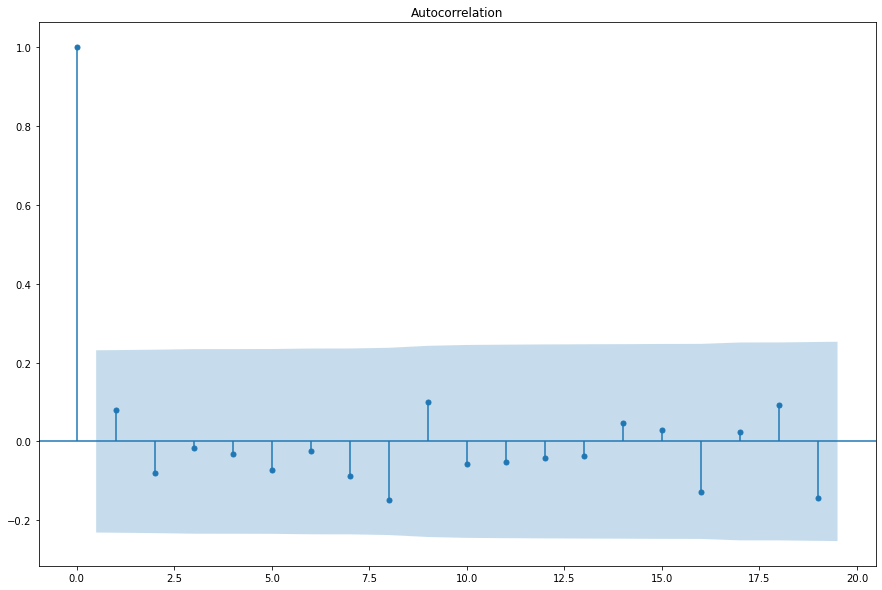

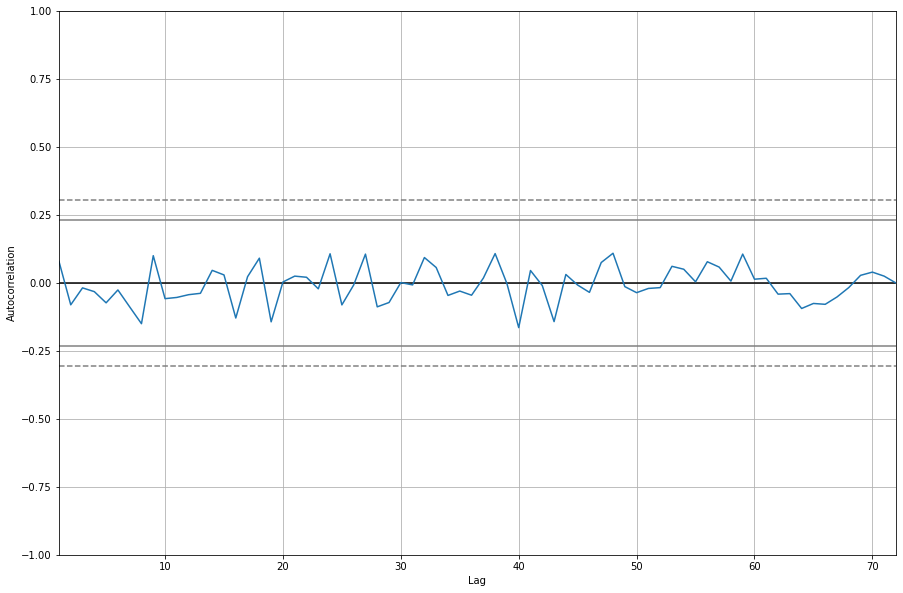

In [26]:
# Plot ACF
rcParams['figure.figsize'] = 15,10
plot_acf(nyse.dropna())

plt.figure(figsize=(15,10))
pd.plotting.autocorrelation_plot(nyse.dropna());

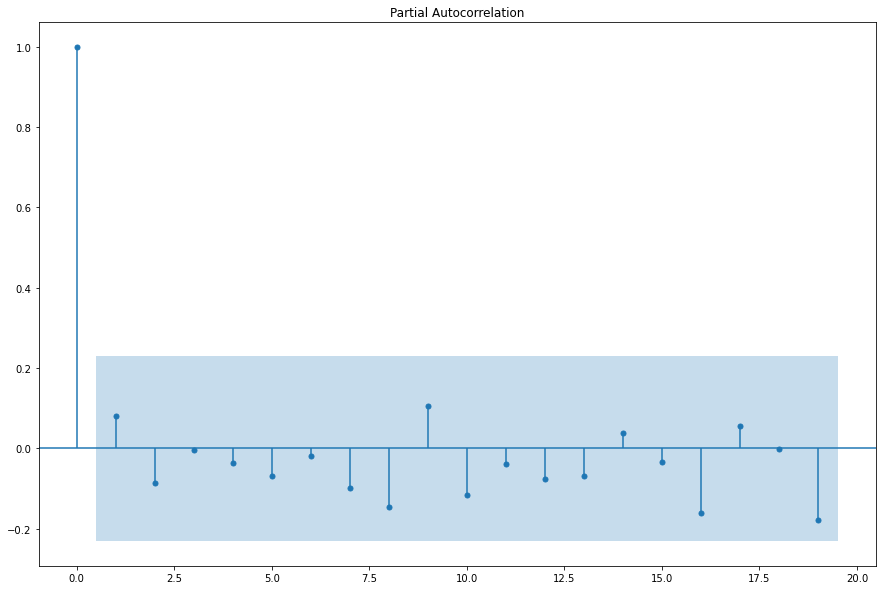

In [27]:
# Plot PACF
rcParams['figure.figsize'] = 15,10
fig = plot_pacf(nyse.dropna(), method='ywm')

## Your conclusion here

In [28]:
# ACF plot does not indicate any clear seasonality.
# The PACF plot shows there is no month with correlation much greater than 0.10 - i.e. there is little correlation in the entire series.
#    More instances of negative correlation occur but they are still less than 0.20 (negative corr.)



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!